![grafik.png](attachment:grafik.png)

# WAIA Data Science with Python 2021 - Week 8 Exercises

scikit learn comes with a number of datasets that we can use to develop basic machine learning solutions. In this homework, we will deal with the breast cancer dataset.

Here you can find more information about the dataset: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

Import the dataset from scikit-learn into a DataFrame called bc. Note that the load_.. function in scikit learn will not directly return a DataFrame but a Bunch object. Read more about this in the scikit-learn documentation.

In [23]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer 
cancer= load_breast_cancer()
bc = pd.DataFrame(cancer.data,columns=cancer.feature_names)
print(bc.shape)




(569, 30)


Examine the first 5 rows of the dataset and its shape

In [24]:
bc.head

<bound method NDFrame.head of      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean conca

Now let's add another column called "diagnosis" and assign it the target variable from the dataset.

In [25]:
bc["diagnosis"] = cancer.target

How many benign (1) and malign (0) tumor diagnoses are in the dataset?

In [5]:
bc["diagnosis"].value_counts()
print(f'There are 357 benign and 212 malignant tumour diagnosis in the dateset')

There are 357 benign and 212 malignant tumour diagnosis in the dateset


Is there any missing data?

In [ ]:
bc.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
diagnosis                  0
dtype: int64

There are no missing values in the dataset.


Any apparent outliers?

<function matplotlib.pyplot.show>

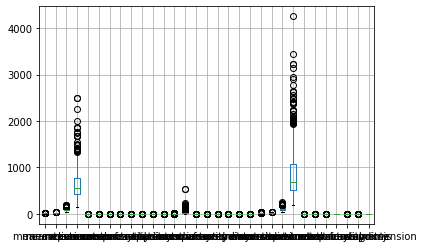

In [7]:
import matplotlib.pyplot as plt
bc.boxplot()
plt.show

Yes, there do seem to be some outlier.

To get a better understanding of the correlation between each column of your dataset, create a scatter matrix of the dataset using seaborn (https://seaborn.pydata.org/examples/scatterplot_matrix.html)

In [12]:
import seaborn as sns

sns.pairplot(bc, hue= "diagnosis")
plt.legend
plt.show

<function matplotlib.pyplot.show>

Plot histgrams for the different radius parameters for the categories malignant and benign to see which features influence the diagnosis. 

<function matplotlib.pyplot.show>

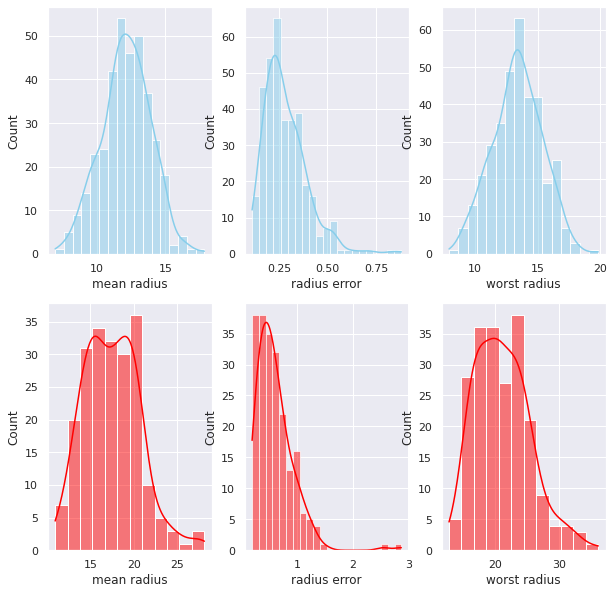

In [11]:
bc.columns # the radius parameters are mean radius,radius error,worst radius

malignant = bc.loc[bc['diagnosis'] == 0]
benign= bc.loc[bc['diagnosis'] == 1]

sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 3, figsize=(10,10))
sns.histplot(data=benign, x="mean radius", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=benign, x="radius error", kde=True, color="skyblue", ax=axs[0, 1])
sns.histplot(data=benign, x="worst radius", kde=True, color="skyblue", ax=axs[0,2])
sns.histplot(data=malignant, x="mean radius", kde=True, color="red", ax=axs[1, 0])
sns.histplot(data=malignant, x="radius error", kde=True, color="red", ax=axs[1, 1])
sns.histplot(data=malignant, x="worst radius", kde=True, color="red", ax=axs[1,2])

plt.show
#blue histogram are for benign tumour and red are for malignant


Let's try to set up three models using this parameter. Each one should contain one of the all the features containing worst, error and mean in their description. Let's choose a logistic regression algorithm for this. Use train_test_split to subdivide your dataset into training and testing (80%/20% division). Have a look at the accuracy score for the model's performance. (Note: Next week you will learn more about how you can judge your model's performance).

In [35]:
bc1=bc[['mean radius','radius error','worst radius','diagnosis']]


Text(0.5, 0.98, 'Scatter-matrix for each radius features')

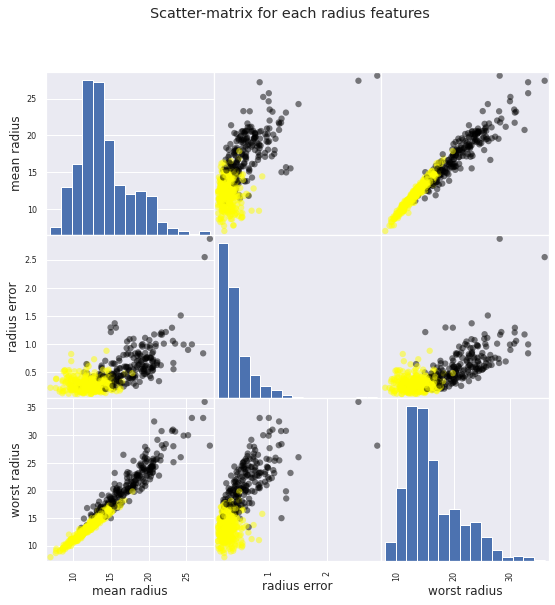

In [34]:
from pandas.plotting import scatter_matrix
from matplotlib import cm

parameters = ['mean radius','radius error','worst radius']
X = bc1[parameters]
y = bc1['diagnosis']

cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each radius features')


In [36]:
bc1.describe()

,mean radius,radius error,worst radius,diagnosis
count,569.000000,569.000000,569.000000,569.000000
mean,14.127292,0.405172,16.269190,0.627417
std,3.524049,0.277313,4.833242,0.483918
min,6.981000,0.111500,7.930000,0.000000
25%,11.700000,0.232400,13.010000,0.000000
50%,13.370000,0.324200,14.970000,1.000000
75%,15.780000,0.478900,18.790000,1.000000
max,28.110000,2.873000,36.040000,1.000000


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [39]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.90
Accuracy of Logistic regression classifier on test set: 0.90
